In [16]:
import numpy as np

# Import data and visualize data
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/quazar/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


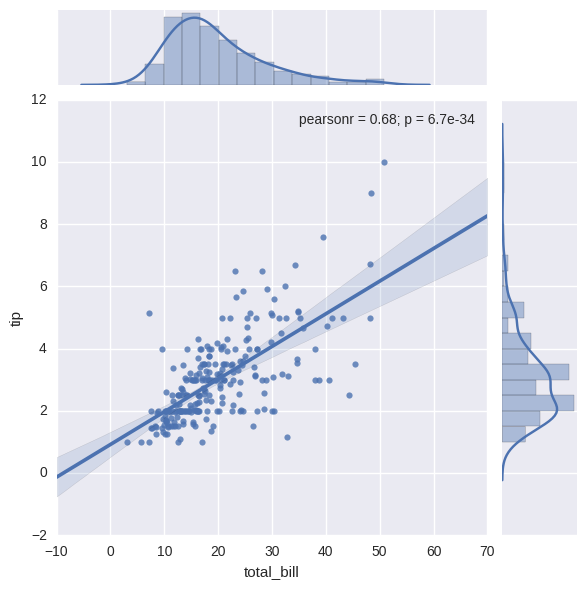

In [31]:
sns.jointplot('total_bill', 'tip', data = tips, kind = 'reg')

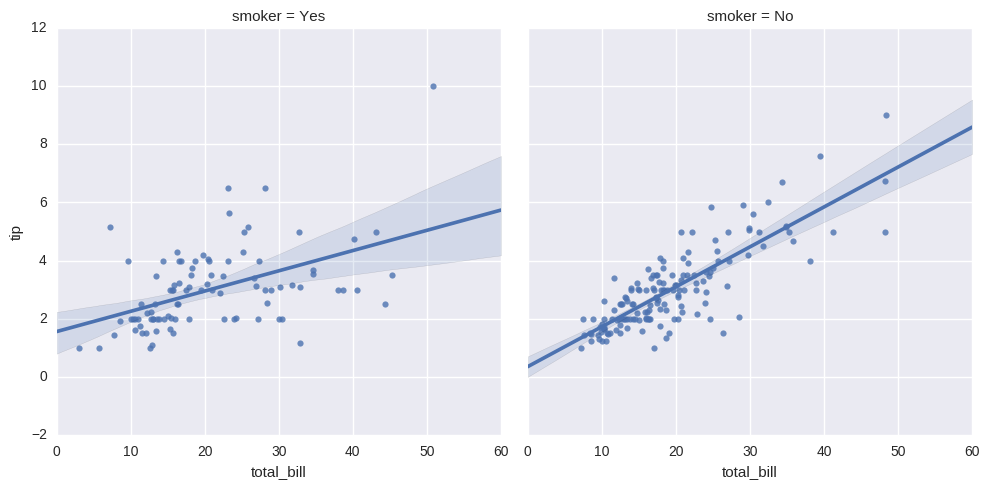

In [33]:
sns.lmplot('total_bill', 'tip', data = tips, col = 'smoker')

Start building the linear regression

In [87]:
def regression(x, y):
    # y = ax + b
    # Find parameters (a, b)
    a = ( (np.mean(x) * np.mean(y)) - (np.mean(x * y)) ) / ( np.square(np.mean(x)) - np.mean(np.square(x)) )
    b = np.mean(y) - ( a * np.mean(x) )
    
    # Plot regression line
    x_min = np.min(x)
    x_max = np.max(x)
    y1 = (a * x_min)+ b
    y2 = (a * x_max)  + b
    plt.plot([x_min, x_max], [y1, y2], c = 'r')
    
    # Plot data
    plt.scatter(x, y)
    
    # Squared error
    error = np.sum([np.square((a * xi - b) - yi) for xi, yi in zip(x, y)])
    return a, b, error

a: 0.10502451738435356 | b: 0.9202696135546695 | error : 1079.3593976036675


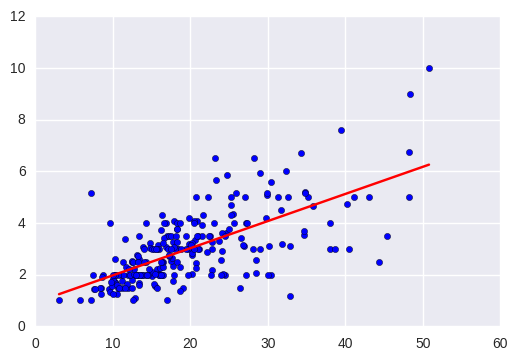

In [88]:
a, b, error = regression(tips['total_bill'], tips['tip'])
print('a: {0} | b: {1} | error : {2}'.format(a, b, error))